# Chicago Crime Data Exploration

The data covers daily crimes in Chicago in 2024.  It's updated daily.  Here is the link to the data: https://data.cityofchicago.org/Public-Safety/Crimes-2024/dqcy-ctma/about_data 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Load the data

file_path = '/Users/YigitAydede/Library/CloudStorage/Dropbox/Documents/Courses/MBAN/NLPBootcamp/PythonBC/Crimes_-_2024_20240804.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
# You can now work with the data variable which contains the contents of the CSV file

## 1. Let's see the data

In [12]:
# Statistical summary of the data
df.describe()
# Display the first 5 rows of the data
print(df.head())
# Display the last 5 rows of the data
print(df.tail())
# Display the shape of the data
print(df.shape)
# Display the column names
print(df.columns)
# Display the data types of the columns
print(df.dtypes)
# Display information about the data
print(df.info())

         ID Case Number                    Date                    Block  \
0  13543719    JH364008  07/27/2024 12:00:00 AM  018XX S SPRINGFIELD AVE   
1  13551073    JH372867  07/27/2024 12:00:00 AM          016XX E 68TH ST   
2  13548638    JH369010  07/27/2024 12:00:00 AM         034XX N CLARK ST   
3  13546333    JH367190  07/27/2024 12:00:00 AM          006XX E 90TH ST   
4  13544042    JH364428  07/27/2024 12:00:00 AM       001XX W HUBBARD ST   

   IUCR         Primary Type               Description Location Description  \
0  0910  MOTOR VEHICLE THEFT                AUTOMOBILE               STREET   
1  1130   DECEPTIVE PRACTICE  FRAUD OR CONFIDENCE GAME            APARTMENT   
2  0890                THEFT             FROM BUILDING        BAR OR TAVERN   
3  0810                THEFT                 OVER $500            RESIDENCE   
4  0870                THEFT            POCKET-PICKING        BAR OR TAVERN   

   Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordina

## 2. Selecting columns and rows

In [13]:
print("\nSelected columns:")
selected_columns = ['ID', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']
print(df[selected_columns].head())


Selected columns:
         ID         Primary Type               Description  \
0  13543719  MOTOR VEHICLE THEFT                AUTOMOBILE   
1  13551073   DECEPTIVE PRACTICE  FRAUD OR CONFIDENCE GAME   
2  13548638                THEFT             FROM BUILDING   
3  13546333                THEFT                 OVER $500   
4  13544042                THEFT            POCKET-PICKING   

  Location Description  Arrest  Domestic  
0               STREET   False     False  
1            APARTMENT   False     False  
2        BAR OR TAVERN   False     False  
3            RESIDENCE   False     False  
4        BAR OR TAVERN   False     False  


In [14]:
print("\nSelected rows based on condition (e.g., Arrest == True):")
arrested_crimes = df[df['Arrest'] == True]
print(arrested_crimes.head())


Selected rows based on condition (e.g., Arrest == True):
          ID Case Number                    Date                    Block  \
20  13543641    JH363989  07/27/2024 12:00:00 AM         053XX N BROADWAY   
23  13543156    JH363451  07/26/2024 11:58:00 PM          009XX W LAKE ST   
27  13543227    JH363420  07/26/2024 11:51:00 PM          003XX E 75TH ST   
28  13543125    JH363403  07/26/2024 11:51:00 PM  006XX S SPRINGFIELD AVE   
31  13543260    JH363408  07/26/2024 11:46:00 PM      034XX W BELMONT AVE   

    IUCR            Primary Type                    Description  \
20  0460                 BATTERY                         SIMPLE   
23  0470  PUBLIC PEACE VIOLATION               RECKLESS CONDUCT   
27  143A       WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   
28  2024               NARCOTICS       POSSESS - HEROIN (WHITE)   
31  0860                   THEFT                   RETAIL THEFT   

   Location Description  Arrest  Domestic  ...  Ward  Community Area  \
20  

## 3. Missing values

In [16]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    590
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate             99
Y Coordinate             99
Year                      0
Updated On                0
Latitude                 99
Longitude                99
Location                 99
dtype: int64


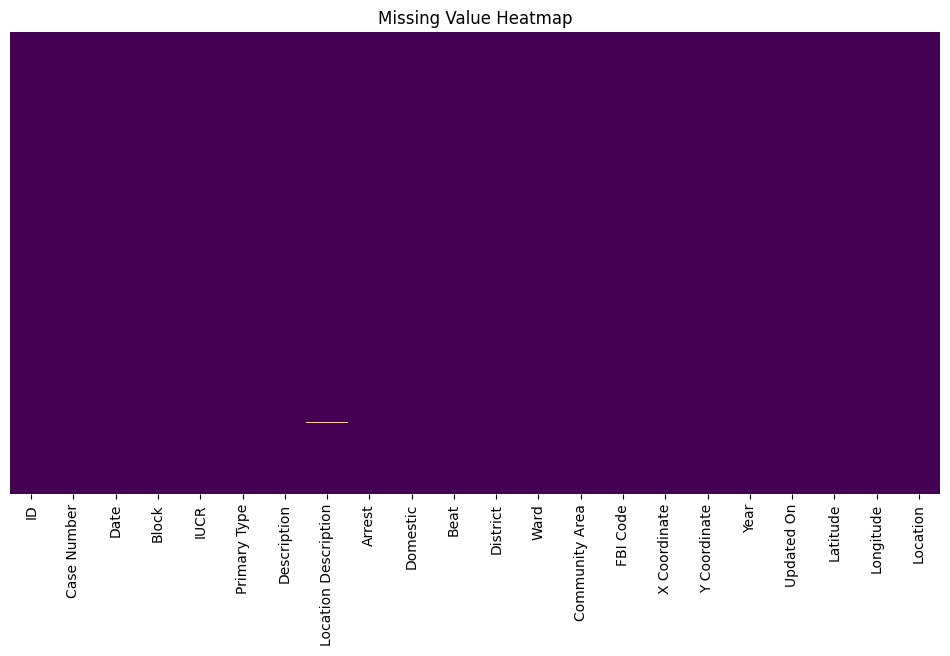

In [15]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

## 4. Explore the data


Crime type distribution:
Primary Type
THEFT                                33076
BATTERY                              26285
CRIMINAL DAMAGE                      16107
ASSAULT                              13363
MOTOR VEHICLE THEFT                  12620
OTHER OFFENSE                         9719
DECEPTIVE PRACTICE                    8499
ROBBERY                               5213
WEAPONS VIOLATION                     4768
BURGLARY                              4282
NARCOTICS                             3318
CRIMINAL TRESPASS                     2732
OFFENSE INVOLVING CHILDREN            1019
CRIMINAL SEXUAL ASSAULT                840
SEX OFFENSE                            716
PUBLIC PEACE VIOLATION                 553
INTERFERENCE WITH PUBLIC OFFICER       388
HOMICIDE                               335
ARSON                                  273
STALKING                               256
PROSTITUTION                           152
LIQUOR LAW VIOLATION                   112
CONCEALED CARRY

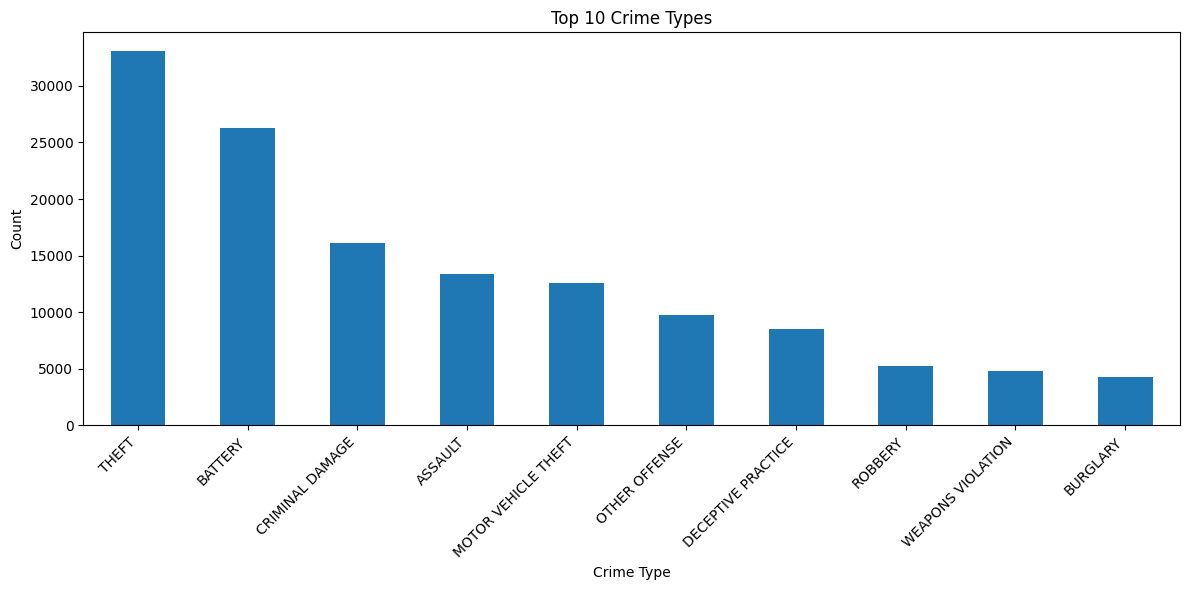

In [17]:
# Analyzes crime type distribution with a bar plot of the top 10 crime types
print("\nCrime type distribution:")
crime_type_counts = df['Primary Type'].value_counts()
print(crime_type_counts)

plt.figure(figsize=(12, 6))
crime_type_counts[:10].plot(kind='bar')
plt.title('Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Arrest rate:
Arrest
False    0.86778
True     0.13222
Name: proportion, dtype: float64


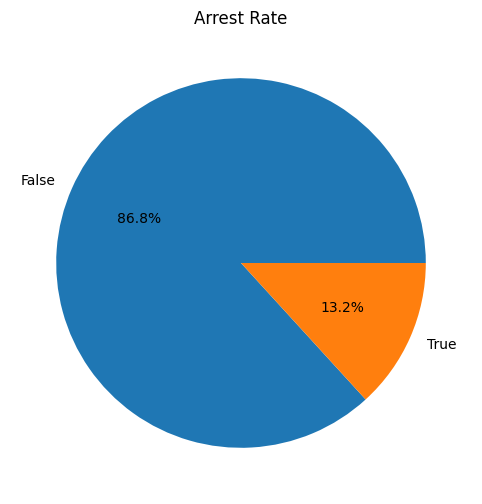

In [18]:
# Calculates and visualizes the arrest rate
print("\nArrest rate:")
arrest_rate = df['Arrest'].value_counts(normalize=True)
print(arrest_rate)

plt.figure(figsize=(8, 6))
arrest_rate.plot(kind='pie', autopct='%1.1f%%')
plt.title('Arrest Rate')
plt.ylabel('')
plt.show()

In [20]:
# Calculate arrest rates by crime types
arrest_rates = df.groupby('Primary Type')['Arrest'].mean()

# Display the arrest rates
print(arrest_rates.sort_values(ascending=False))


Primary Type
GAMBLING                             1.000000
PUBLIC INDECENCY                     1.000000
OTHER NARCOTIC VIOLATION             1.000000
CONCEALED CARRY LICENSE VIOLATION    0.963636
NARCOTICS                            0.946956
LIQUOR LAW VIOLATION                 0.946429
PROSTITUTION                         0.940789
INTERFERENCE WITH PUBLIC OFFICER     0.878866
WEAPONS VIOLATION                    0.584312
PUBLIC PEACE VIOLATION               0.520796
OBSCENITY                            0.424242
CRIMINAL TRESPASS                    0.286237
HOMICIDE                             0.194030
OTHER OFFENSE                        0.191069
BATTERY                              0.163477
ASSAULT                              0.101923
ARSON                                0.076923
SEX OFFENSE                          0.071229
STALKING                             0.070312
OFFENSE INVOLVING CHILDREN           0.062807
THEFT                                0.061223
ROBBERY              

/var/folders/b2/gpnsjh9j6bv5prtx7w5lsym80000gp/T/ipykernel_84591/3956560368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robbery_data['Day of Week'] = robbery_data['Date'].dt.day_name()


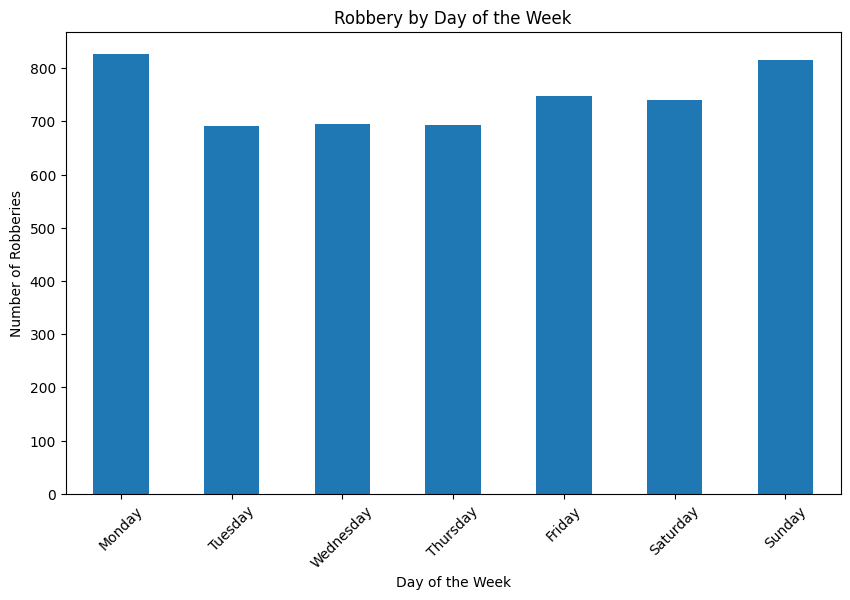

In [26]:
import datetime

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for 'ROBBERY'
robbery_data = df[df['Primary Type'] == 'ROBBERY']

# Extract the day of the week
robbery_data['Day of Week'] = robbery_data['Date'].dt.day_name()

# Group the data by day of the week and count the number of robberies
robbery_by_day = robbery_data.groupby('Day of Week').size()

# Reindex to ensure all days are represented
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
robbery_by_day = robbery_by_day.reindex(days_of_week, fill_value=0)

# Create the bar plot
plt.figure(figsize=(10, 6))
robbery_by_day.plot(kind='bar')
plt.title('Robbery by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Robberies')
plt.xticks(rotation=45)
plt.show()


## 5.  Mapping the 2024 Chicago Crime Data

In [2]:
%%capture
!pip install folium

In [29]:
import folium
from folium.plugins import HeatMap

# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Create a HeatMap layer using the crime data
heat_data = df[['Latitude', 'Longitude']].dropna()
heat_map = HeatMap(data=heat_data, radius=15)

# Add the HeatMap layer to the map
heat_map.add_to(chicago_map)

# Display the map
chicago_map


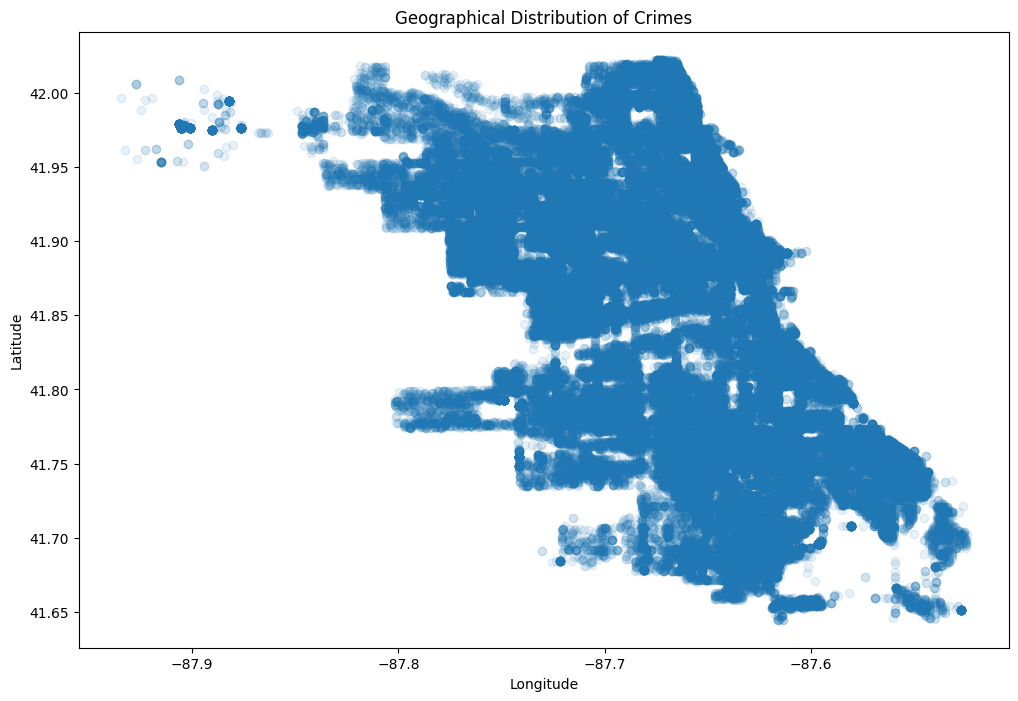

In [30]:
# 6. Geographical Distribution
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1)
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 6. Time-based Analysis
Extracts the hour from the date and analyzes hourly crime distribution

/var/folders/b2/gpnsjh9j6bv5prtx7w5lsym80000gp/T/ipykernel_84591/1865543446.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'])


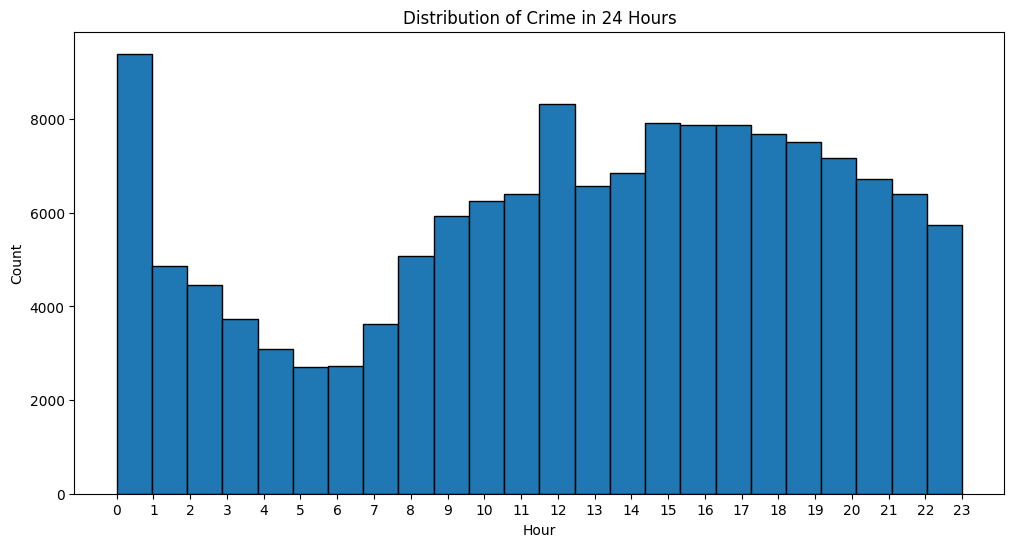

In [40]:
file_path = '/Users/YigitAydede/Library/CloudStorage/Dropbox/Documents/Courses/MBAN/NLPBootcamp/PythonBC/Crimes_-_2024_20240804.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

# Ensure the 'Date' column is in datetime format with AM/PM
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract the hour from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Create a histogram of the crime distribution in 24 hours
plt.figure(figsize=(12, 6))
plt.hist(df['Hour'], bins=24, edgecolor='black')
plt.title('Distribution of Crime in 24 Hours')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(24))
plt.show()

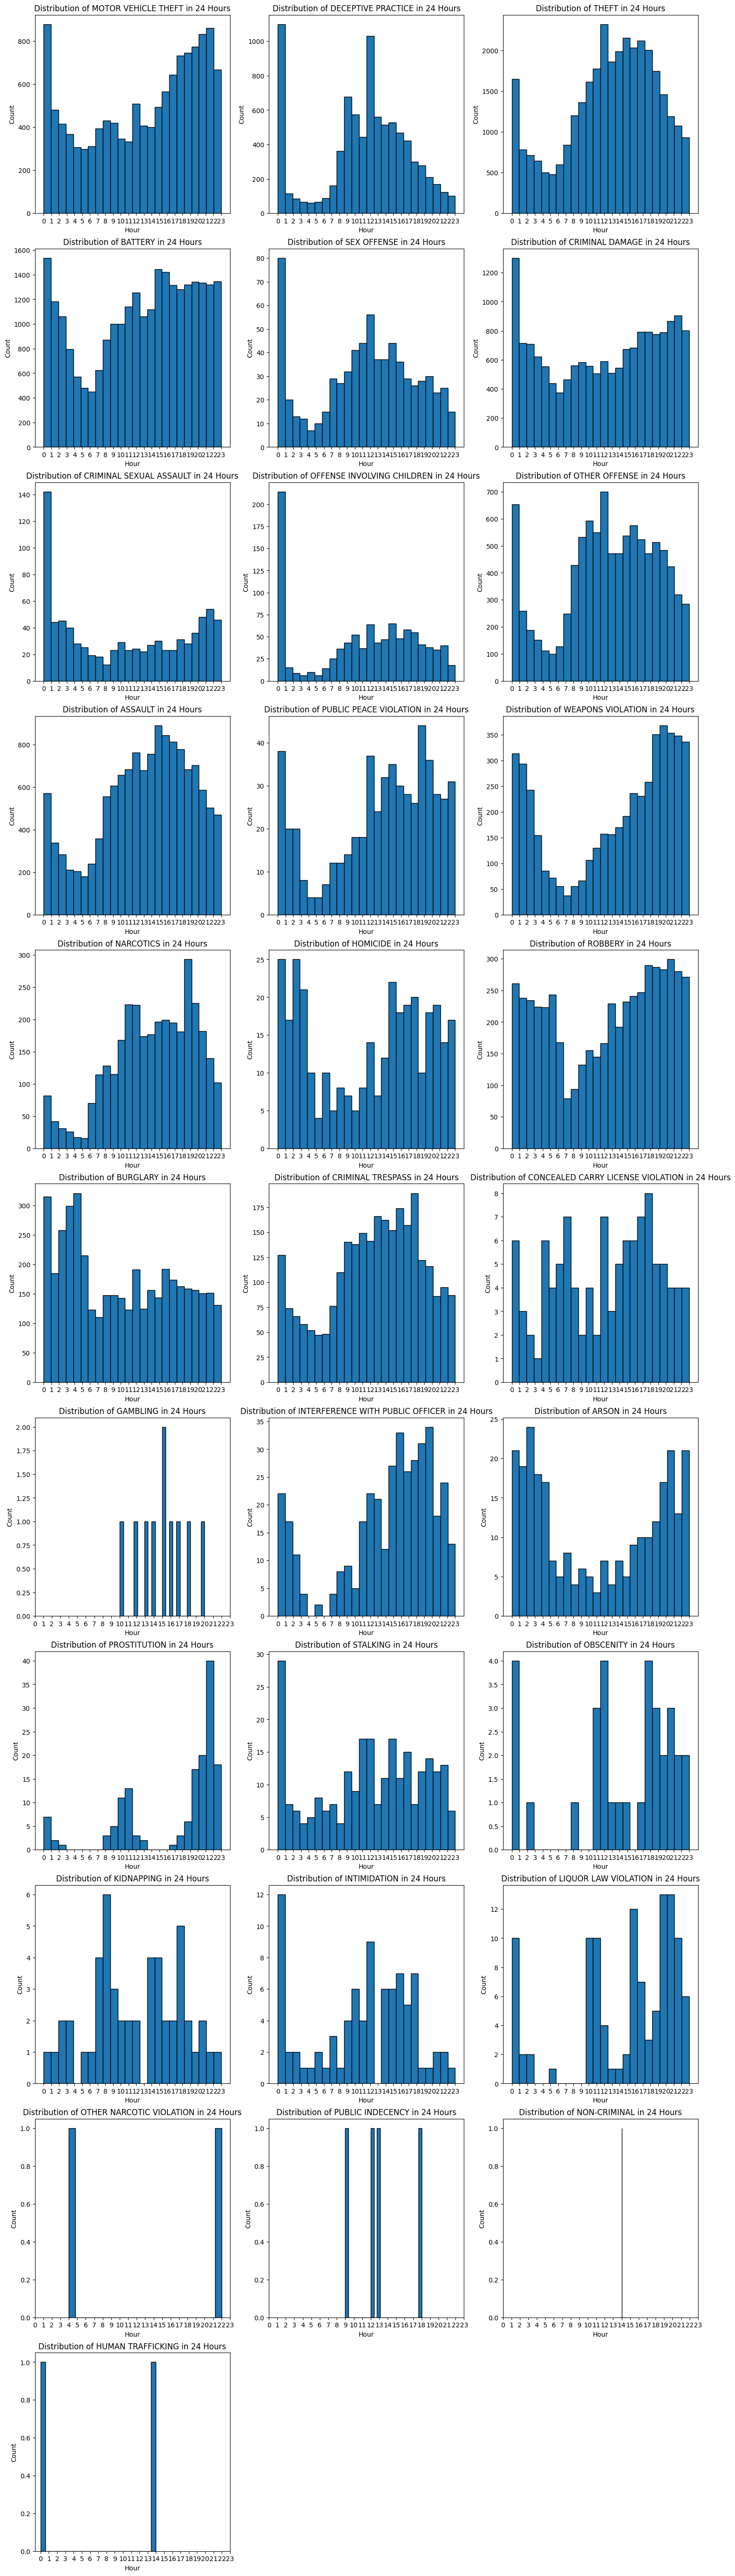

In [42]:
import numpy as np

### Each crime type in 24 hours
# Get unique crime types
crime_types = df['Primary Type'].unique()

# Determine the number of rows and columns for the subplots
num_crime_types = len(crime_types)
num_cols = 3
num_rows = int(np.ceil(num_crime_types / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

# Plot histograms for each crime type
for i, crime_type in enumerate(crime_types):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Filter data for the current crime type
    crime_data = df[df['Primary Type'] == crime_type]
    
    # Create histogram
    ax.hist(crime_data['Hour'], bins=24, edgecolor='black')
    ax.set_title(f'Distribution of {crime_type} in 24 Hours')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_xticks(range(24))

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

# Display the plots
plt.show()
